       no_of_rounds       B_draw  B_avg_SIG_STR_landed  B_avg_SIG_STR_pct  \
count   4896.000000  4896.000000           4896.000000        4896.000000   
mean       3.181985     0.010621             26.308875           0.444001   
std        0.571515     0.108333             18.842430           0.111482   
min        3.000000     0.000000              0.000000           0.000000   
25%        3.000000     0.000000             10.940000           0.400000   
50%        3.000000     0.000000             26.310000           0.440000   
75%        3.000000     0.000000             35.130000           0.500000   
max        5.000000     2.000000            154.000000           1.000000   

       B_avg_SUB_ATT  B_avg_TD_landed  B_avg_TD_pct     B_losses  \
count    4896.000000      4896.000000   4896.000000  4896.000000   
mean        0.503779         1.250942      0.312057     1.726511   
std         0.619661         1.218504      0.226958     2.080347   
min         0.000000         0.000

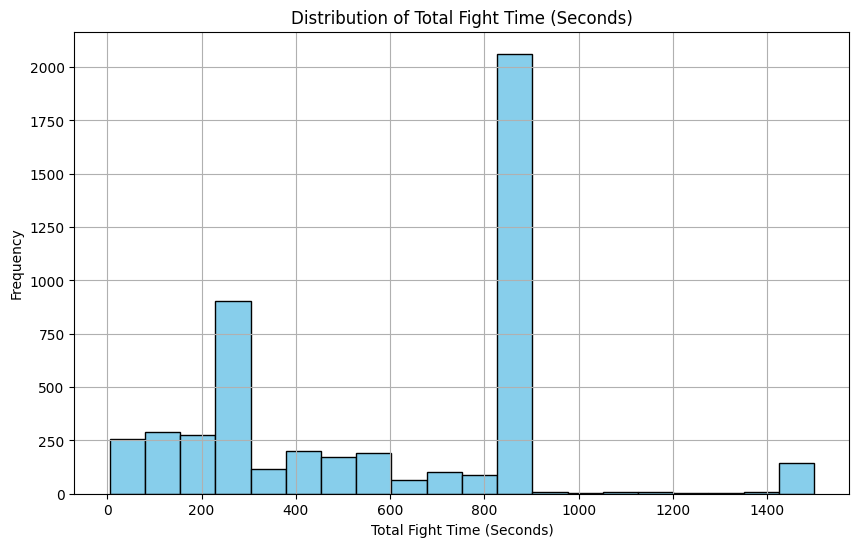

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned data
cleaned_ufc_data = pd.read_csv('fight_data_cleaned.csv')

# Statistical analysis
summary_stats = cleaned_ufc_data.describe()
print(summary_stats)

# Histogram of 'total_fight_time_secs'
plt.figure(figsize=(10, 6))
plt.hist(cleaned_ufc_data['total_fight_time_secs'], bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Total Fight Time (Seconds)')
plt.xlabel('Total Fight Time (Seconds)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

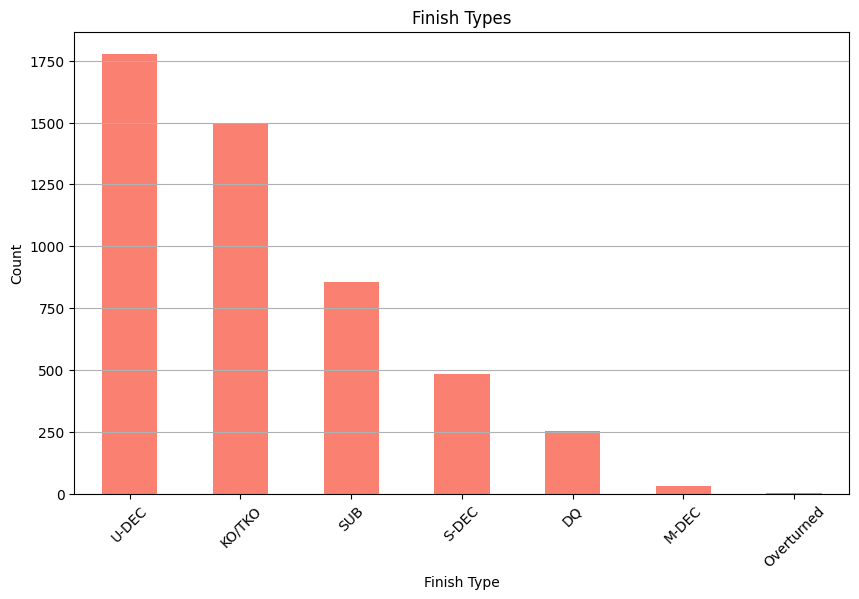

In [17]:
# Bar plot of finish types
finish_counts = cleaned_ufc_data['finish'].value_counts()
plt.figure(figsize=(10, 6))
finish_counts.plot(kind='bar', color='salmon')
plt.title('Finish Types')
plt.xlabel('Finish Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

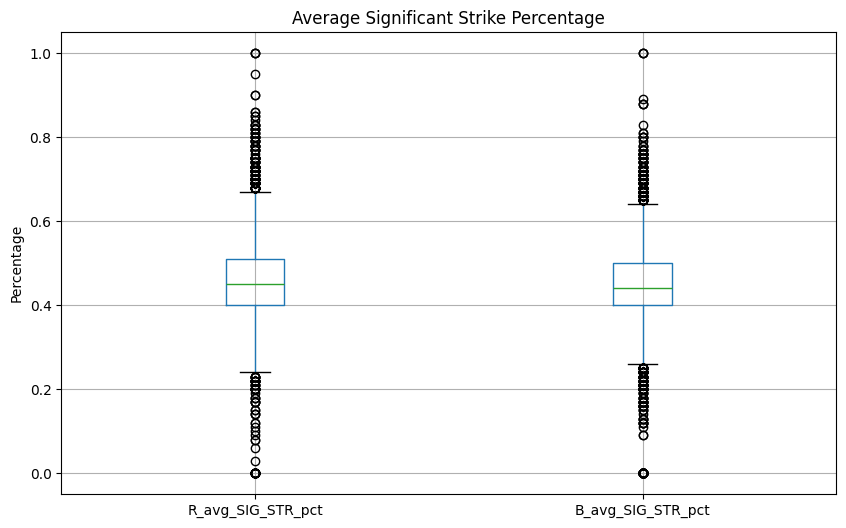

In [18]:
# Box plot of 'R_avg_SIG_STR_pct' and 'B_avg_SIG_STR_pct'
plt.figure(figsize=(10, 6))
cleaned_ufc_data[['R_avg_SIG_STR_pct', 'B_avg_SIG_STR_pct']].boxplot()
plt.title('Average Significant Strike Percentage')
plt.ylabel('Percentage')
plt.grid(True)
plt.show()

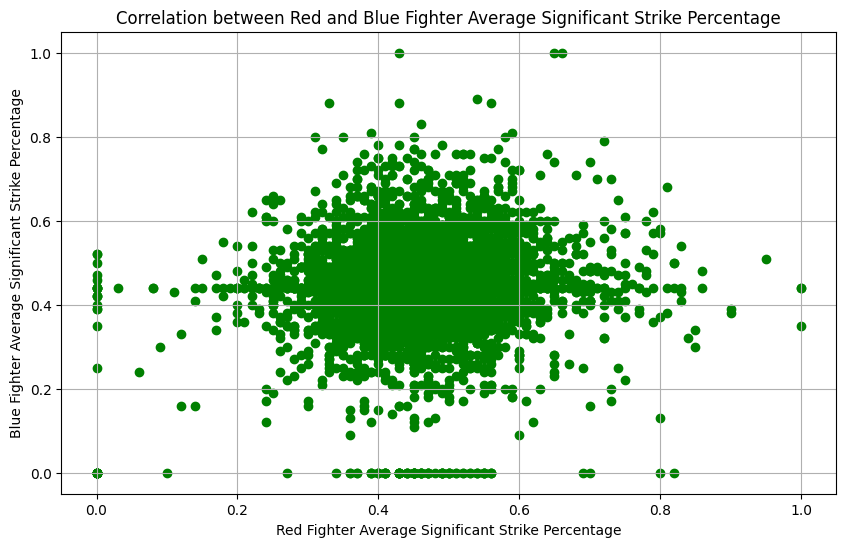

In [19]:
# Scatter plot of 'R_avg_SIG_STR_pct' vs 'B_avg_SIG_STR_pct'
plt.figure(figsize=(10, 6))
plt.scatter(cleaned_ufc_data['R_avg_SIG_STR_pct'], cleaned_ufc_data['B_avg_SIG_STR_pct'], color='green')
plt.title('Correlation between Red and Blue Fighter Average Significant Strike Percentage')
plt.xlabel('Red Fighter Average Significant Strike Percentage')
plt.ylabel('Blue Fighter Average Significant Strike Percentage')
plt.grid(True)
plt.show()


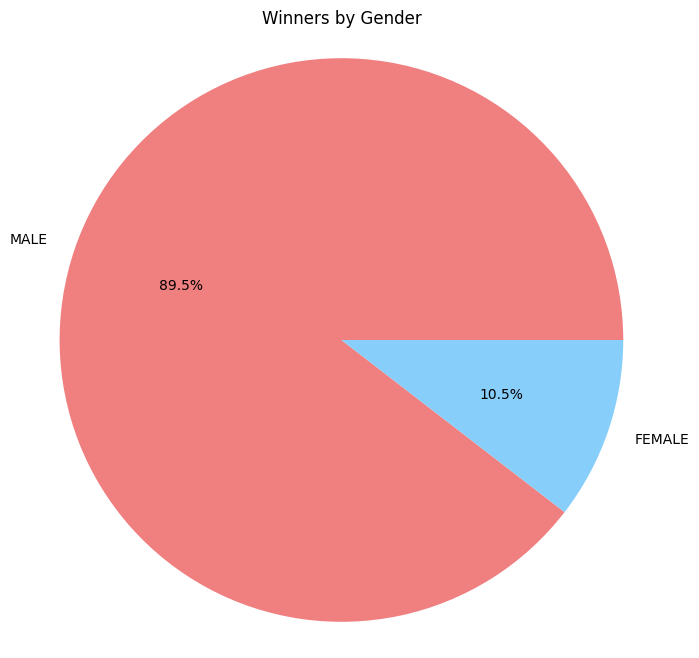

In [20]:
# Pie chart of winners by gender
gender_counts = cleaned_ufc_data['gender'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', colors=['lightcoral', 'lightskyblue'])
plt.title('Winners by Gender')
plt.axis('equal')
plt.show()

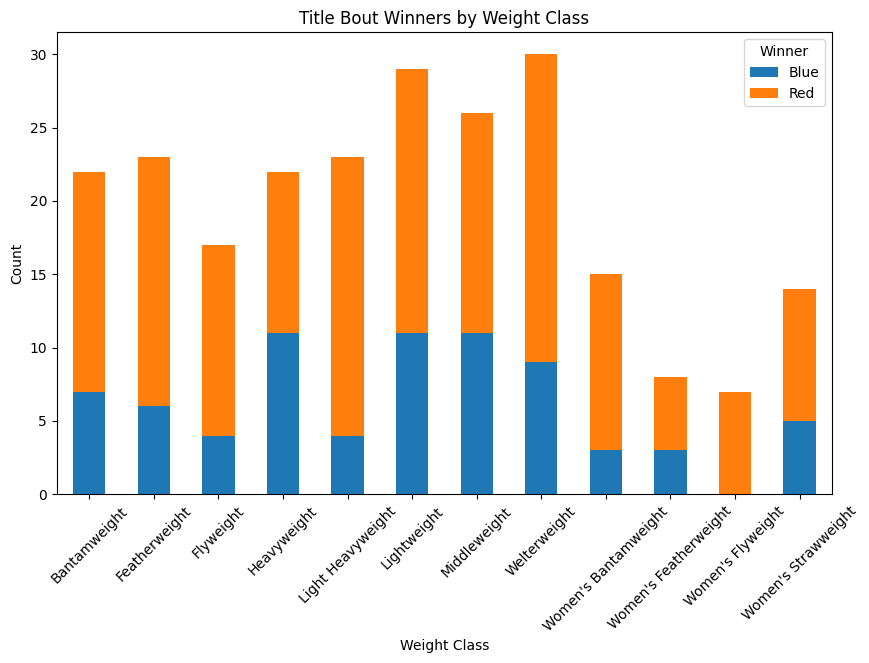

In [21]:
# Stacked bar chart of title bout winners by weight class
title_bout_winners = cleaned_ufc_data[cleaned_ufc_data['title_bout'] == True]
title_bout_winners_by_weight_class = title_bout_winners.groupby(['weight_class', 'Winner']).size().unstack()
title_bout_winners_by_weight_class.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.title('Title Bout Winners by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Winner')
plt.show()


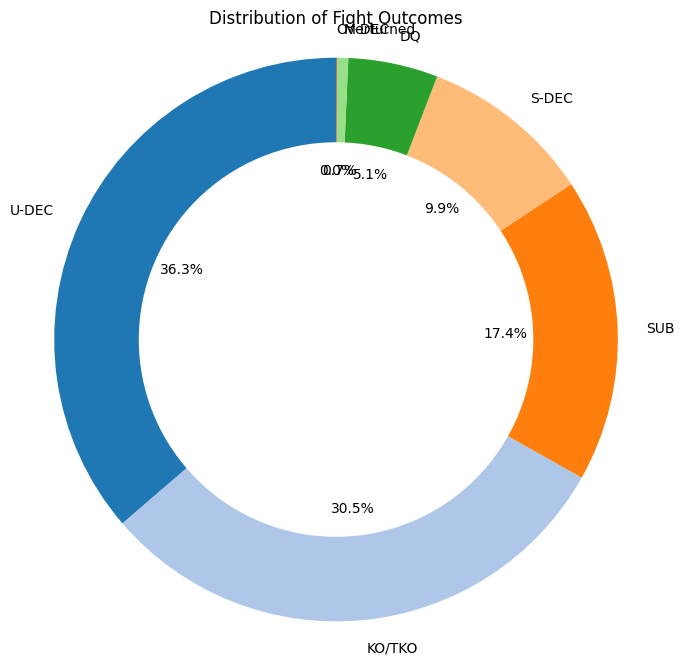

In [22]:
# Donut chart of distribution of fight outcomes
fight_outcomes = cleaned_ufc_data['finish'].value_counts()
plt.figure(figsize=(8, 8))
plt.pie(fight_outcomes, labels=fight_outcomes.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.tab20.colors)
plt.title('Distribution of Fight Outcomes')
plt.axis('equal')
# Draw a circle at the center of pie to make it look like a donut
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
plt.show()


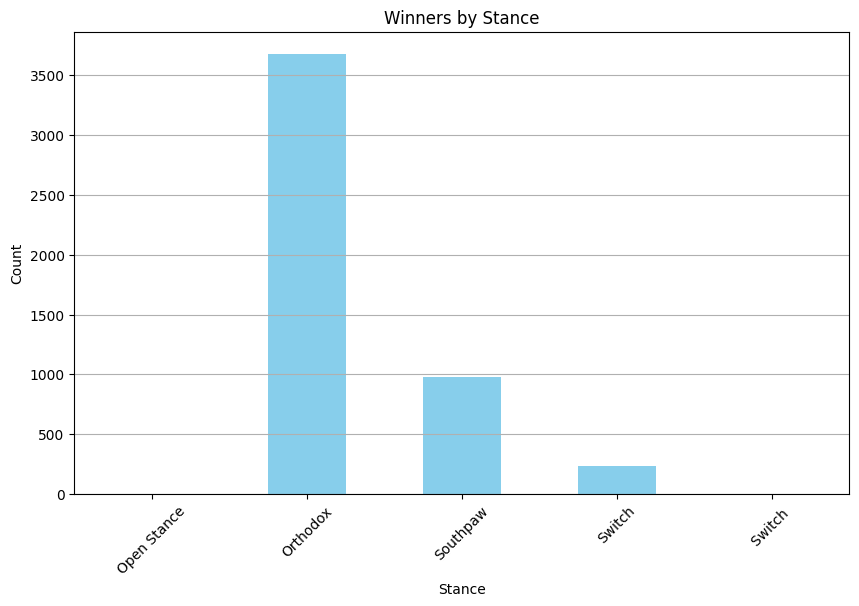

In [23]:
# Bar chart of winners by stance
stance_counts = cleaned_ufc_data['Winner'].groupby(cleaned_ufc_data['B_Stance']).count()
stance_counts.plot(kind='bar', figsize=(10, 6), color='skyblue')
plt.title('Winners by Stance')
plt.xlabel('Stance')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


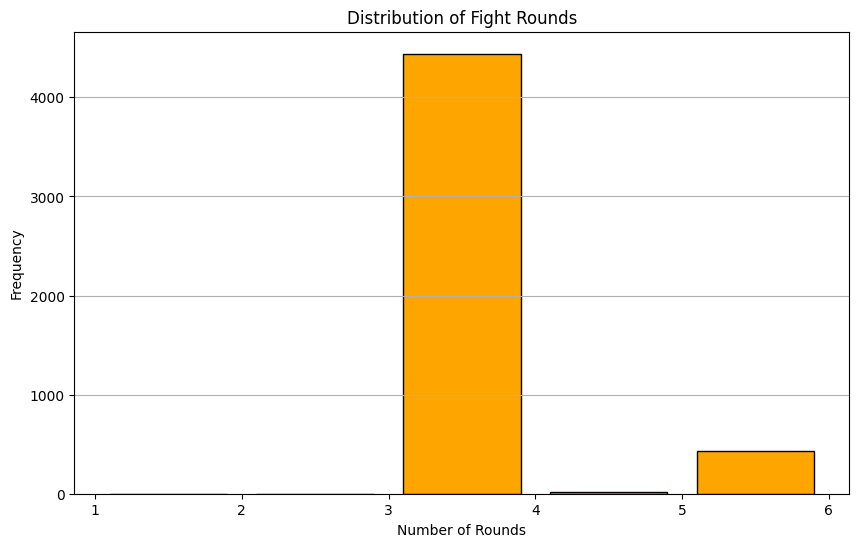

In [24]:
# Histogram of number of rounds
plt.figure(figsize=(10, 6))
plt.hist(cleaned_ufc_data['no_of_rounds'], bins=range(1, 7), rwidth=0.8, color='orange', edgecolor='black')
plt.title('Distribution of Fight Rounds')
plt.xlabel('Number of Rounds')
plt.ylabel('Frequency')
plt.xticks(range(1, 7))
plt.grid(axis='y')
plt.show()


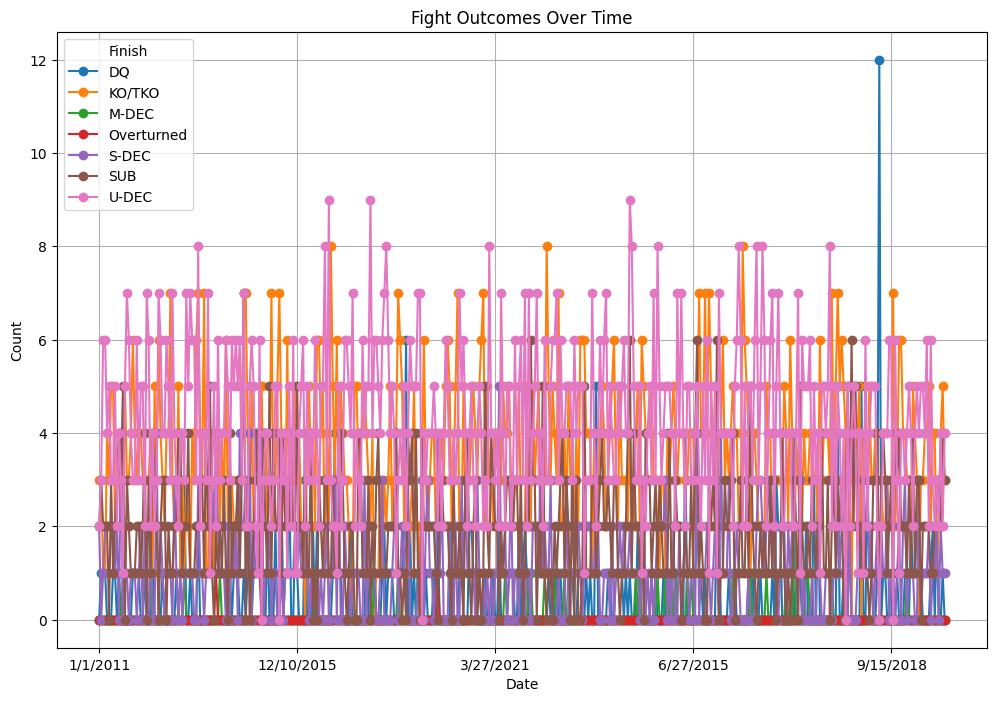

In [25]:
# Line plot of fight outcomes over time
outcome_over_time = cleaned_ufc_data.groupby('date')['finish'].value_counts().unstack().fillna(0)
outcome_over_time.plot(kind='line', figsize=(12, 8), marker='o')
plt.title('Fight Outcomes Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend(title='Finish')
plt.grid(True)
plt.show()


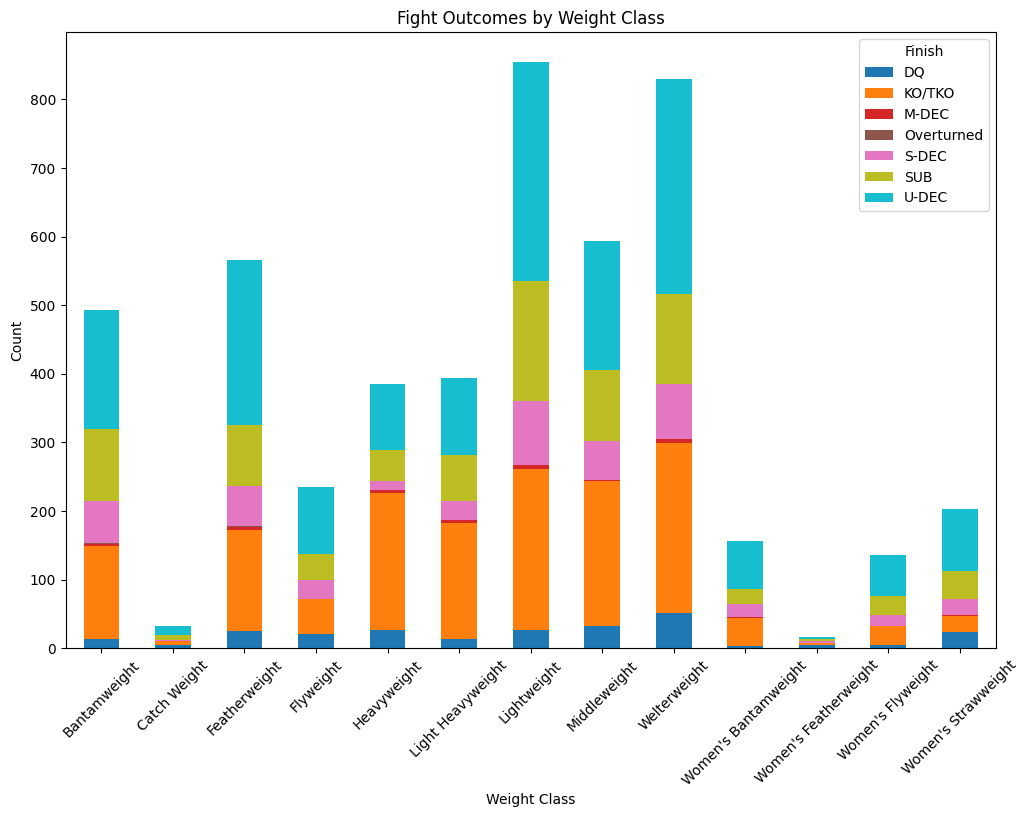

In [26]:
# Stacked bar chart of fight outcomes by weight class
fight_outcomes_by_weight_class = cleaned_ufc_data.groupby(['weight_class', 'finish']).size().unstack()
fight_outcomes_by_weight_class.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')
plt.title('Fight Outcomes by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Finish')
plt.show()


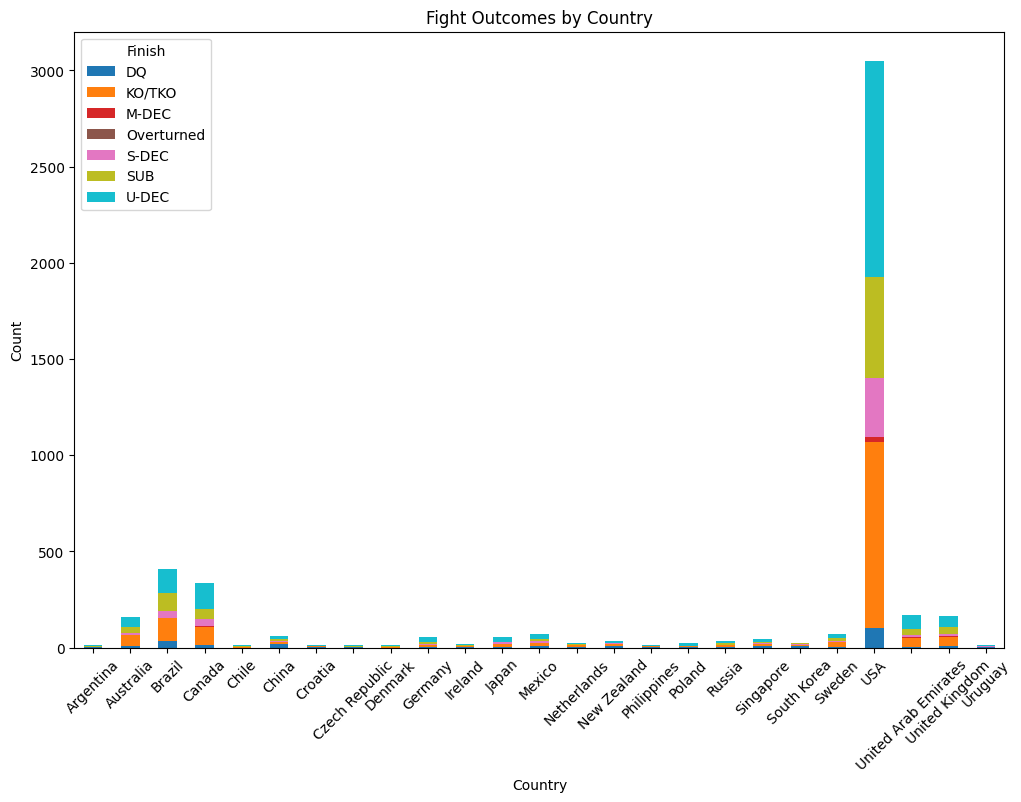

In [27]:
# Stacked bar chart of fight outcomes by country
fight_outcomes_by_country = cleaned_ufc_data.groupby(['country', 'finish']).size().unstack()
fight_outcomes_by_country.plot(kind='bar', stacked=True, figsize=(12, 8), cmap='tab10')
plt.title('Fight Outcomes by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Finish')
plt.show()


/var/folders/mj/d586gltx7sl6tnrns06l047m0000gn/T/ipykernel_51249/977971621.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='weight_class', y='B_avg_SIG_STR_landed', data=cleaned_ufc_data, palette='Set2')


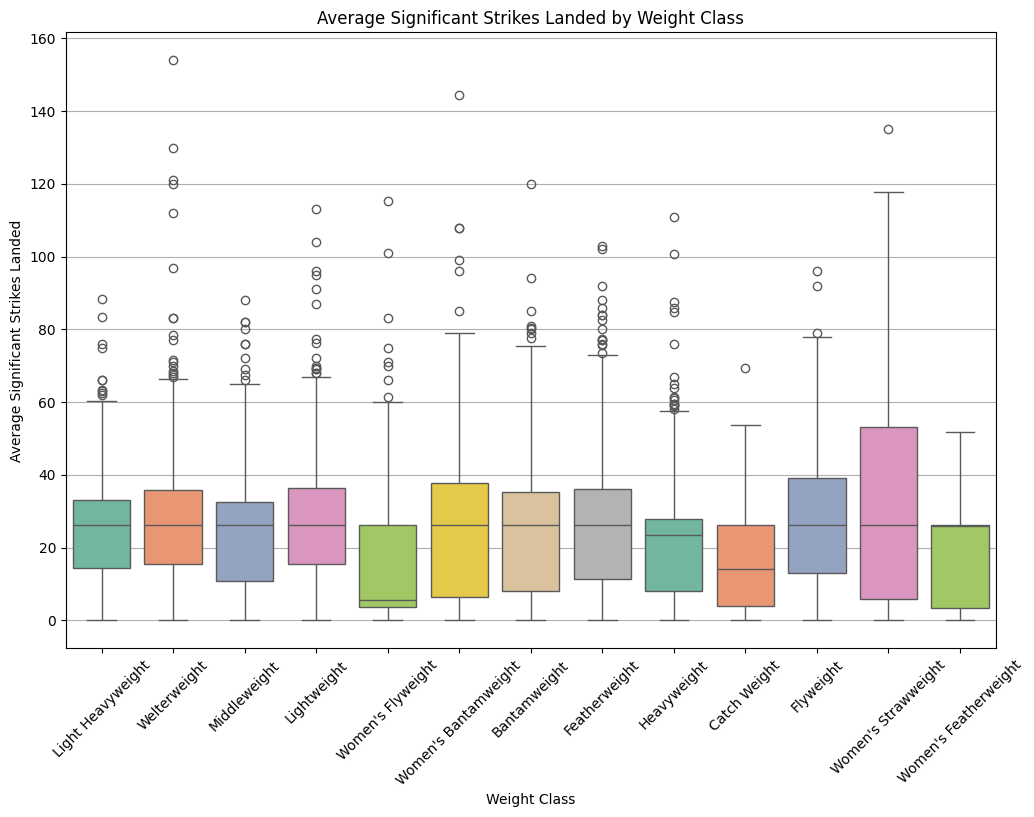

In [29]:
# Box plot of average significant strikes landed by weight class
plt.figure(figsize=(12, 8))
sns.boxplot(x='weight_class', y='B_avg_SIG_STR_landed', data=cleaned_ufc_data, palette='Set2')
plt.title('Average Significant Strikes Landed by Weight Class')
plt.xlabel('Weight Class')
plt.ylabel('Average Significant Strikes Landed')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


/var/folders/mj/d586gltx7sl6tnrns06l047m0000gn/T/ipykernel_51249/2040484295.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='gender', y='R_age', data=cleaned_ufc_data, palette='pastel')


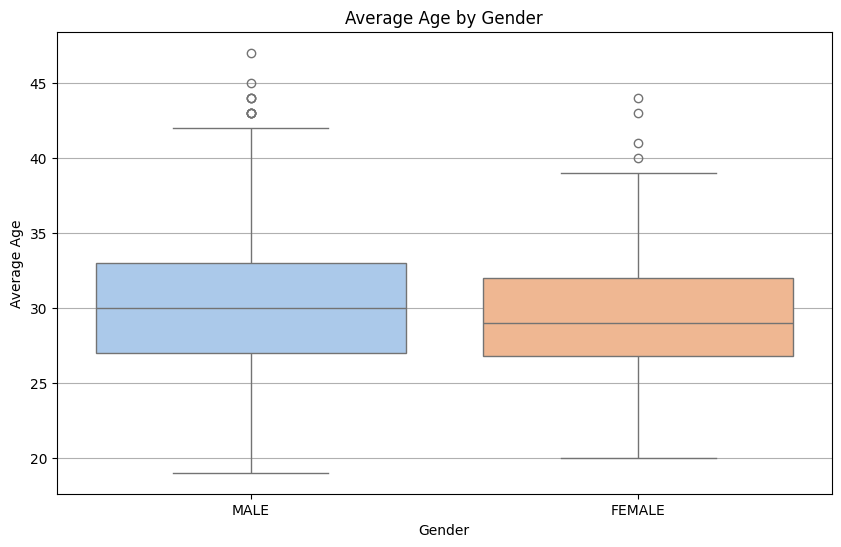

In [30]:
# Box plot of average age by gender
plt.figure(figsize=(10, 6))
sns.boxplot(x='gender', y='R_age', data=cleaned_ufc_data, palette='pastel')
plt.title('Average Age by Gender')
plt.xlabel('Gender')
plt.ylabel('Average Age')
plt.grid(axis='y')
plt.show()


Correlation between reach and winning the fight: 0.01329058775802398


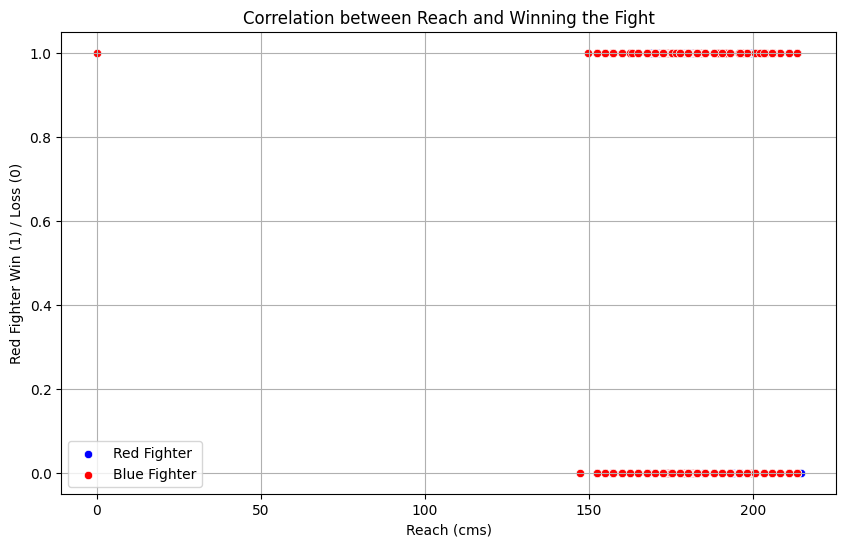

In [34]:
#Reach vs win

cleaned_ufc_data['R_Reach_cms'] = cleaned_ufc_data['R_Reach_cms'].astype(float)
cleaned_ufc_data['B_Reach_cms'] = cleaned_ufc_data['B_Reach_cms'].astype(float)

# Create a binary variable indicating whether red fighter won or not
cleaned_ufc_data['Red_Win'] = (cleaned_ufc_data['Winner'] == 'Red').astype(int)

# Calculate Pearson correlation coefficient
reach_correlation = cleaned_ufc_data[['R_Reach_cms', 'B_Reach_cms', 'Red_Win']].corr()['Red_Win']['R_Reach_cms']

print("Correlation between reach and winning the fight:", reach_correlation)

# Plot the graph
plt.figure(figsize=(10, 6))
sns.scatterplot(x='R_Reach_cms', y='Red_Win', data=cleaned_ufc_data, color='blue', label='Red Fighter')
sns.scatterplot(x='B_Reach_cms', y='Red_Win', data=cleaned_ufc_data, color='red', label='Blue Fighter')
plt.title('Correlation between Reach and Winning the Fight')
plt.xlabel('Reach (cms)')
plt.ylabel('Red Fighter Win (1) / Loss (0)')
plt.legend()
plt.grid(True)
plt.show()

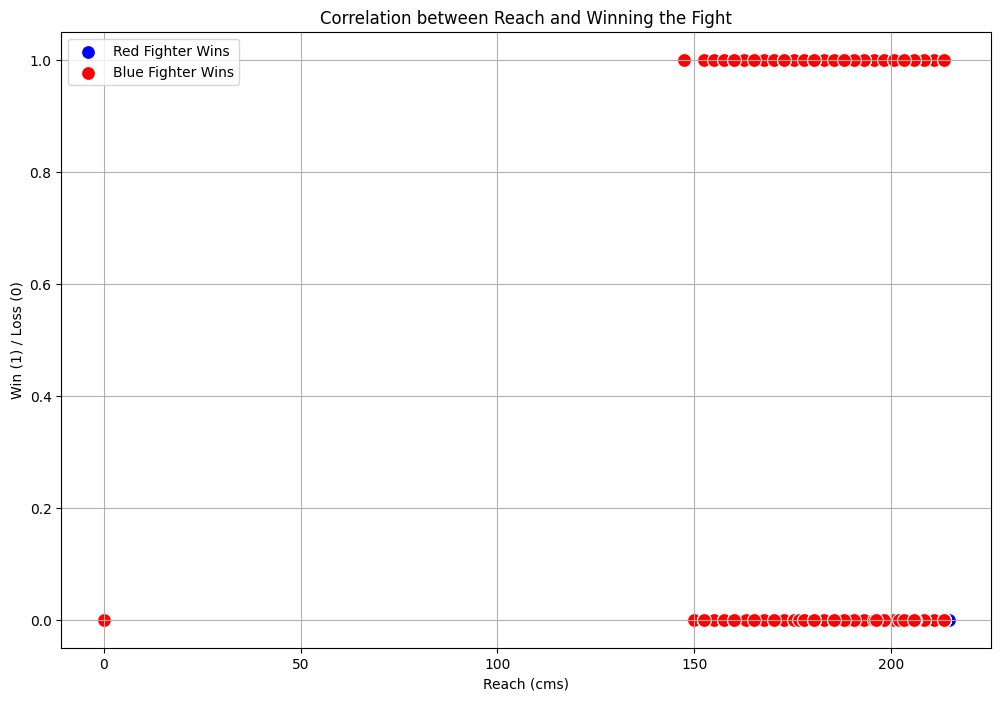

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'reach' data is already in numbers
# Convert 'reach' to numeric
cleaned_ufc_data['R_Reach_cms'] = cleaned_ufc_data['R_Reach_cms'].astype(float)
cleaned_ufc_data['B_Reach_cms'] = cleaned_ufc_data['B_Reach_cms'].astype(float)

# Create a binary variable indicating whether red fighter won or not
cleaned_ufc_data['Red_Win'] = (cleaned_ufc_data['Winner'] == 'Red').astype(int)
cleaned_ufc_data['Blue_Win'] = (cleaned_ufc_data['Winner'] == 'Blue').astype(int)

# Plot the graph
plt.figure(figsize=(12, 8))

# Plot red fighter reach
sns.scatterplot(x='R_Reach_cms', y='Red_Win', data=cleaned_ufc_data, color='blue', label='Red Fighter Wins', marker='o', s=100)

# Plot blue fighter reach
sns.scatterplot(x='B_Reach_cms', y='Blue_Win', data=cleaned_ufc_data, color='red', label='Blue Fighter Wins', marker='o', s=100)

plt.title('Correlation between Reach and Winning the Fight')
plt.xlabel('Reach (cms)')
plt.ylabel('Win (1) / Loss (0)')
plt.legend()
plt.grid(True)
plt.show()
